# Barnes-Hut Method for N-body Simulation
## Initial Tests to Verify Implementation


In [5]:

%load_ext autoreload
%autoreload 2
import numpy as np
from modules.Particle import Particle
from modules.BH_Classes import BH
from modules.Analytic_Classes import SingleParticle
import copy
import modules.Utility as util
import matplotlib.pyplot as plt
from modules.Direct_Classes import Direct

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Single Massive Particle Simulation

In [6]:
n_particles = 5000
max_mass = 1E-100
box_size = 1000
theta=1
initial_positions = np.random.random((n_particles,3)) * box_size
initial_particles = []
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(0,max_mass)))

single_particle_position = np.array([0.5,0.5,0.5])*box_size
single_particle_property = 1
initial_particles.append(Particle(single_particle_position, single_particle_property))

# Run Simulations
bh_particles = copy.deepcopy(initial_particles)
bh_simulation = BH(box_size, bh_particles, theta=theta)
bh_simulation.run(single_particle_position, plotting=False)

analytic_particles = copy.deepcopy(initial_particles)
analytic_simulation = SingleParticle(single_particle_position, single_particle_property, box_size)
analytic_simulation.evaluate_particle_acceleration(analytic_particles)

0


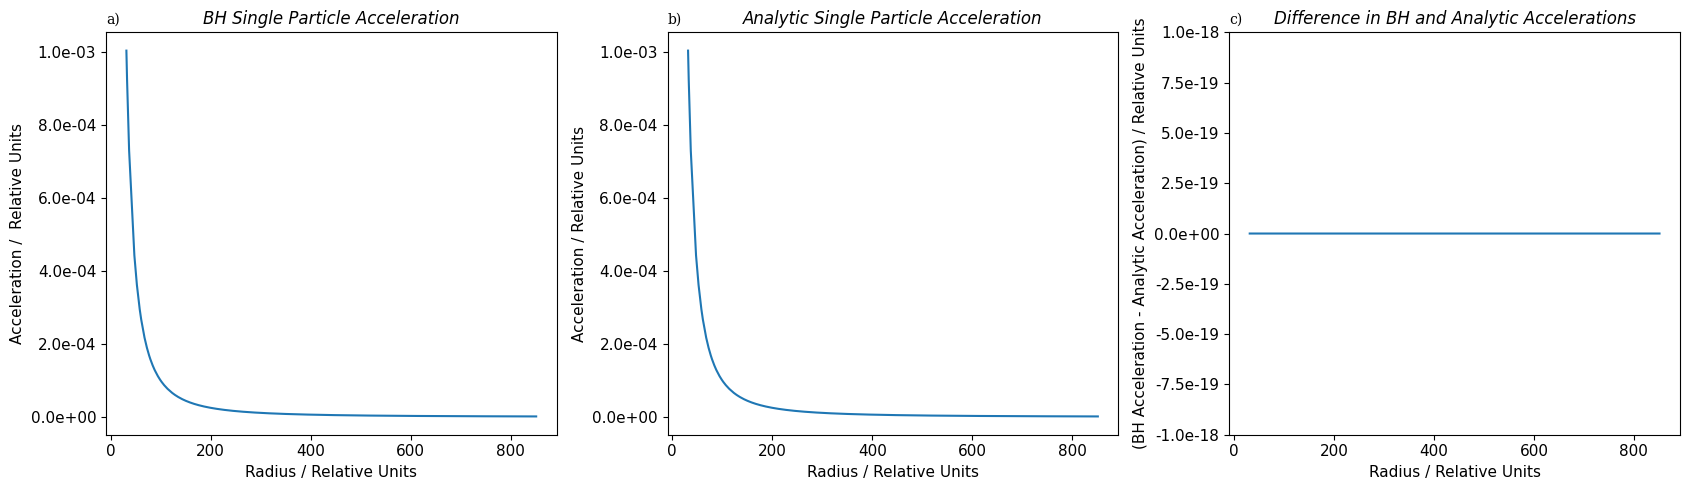

In [46]:
single_particle_fig, single_particle_axs = plt.subplots(1,3)
plt.rcParams.update({'font.size': 10})
bh_results = util.calc_3D_results(bh_particles, single_particle_position, plotting=True, fig=single_particle_fig, ax=single_particle_axs[0], title="BH Single Particle Acceleration", x_label="Radius / Relative Units", y_label="Acceleration /  Relative Units", axis_label = "a)")
analytic_results = util.calc_3D_results(analytic_particles, single_particle_position, plotting=True, fig=single_particle_fig, ax=single_particle_axs[1], title="Analytic Single Particle Acceleration", x_label="Radius / Relative Units", y_label="Acceleration / Relative Units", axis_label = "b)")
bh_analytic_results = util.calc_3D_difference_results(bh_particles, analytic_particles, single_particle_position, True, fig=single_particle_fig, ax=single_particle_axs[2], y_range=[-1E-18, 1E-18], title="Difference in BH and Analytic Accelerations", x_label="Radius / Relative Units", y_label="(BH Acceleration - Analytic Acceleration) / Relative Units", axis_label = "c)")
single_particle_fig.set_size_inches(17,5)
single_particle_fig.tight_layout()


### Many Massive Particles Simulation

In [8]:
# Initialise many massive particle simulation
n_particles = 5000
max_mass = 1
box_size = 1000
initial_positions = np.random.random((n_particles,3)) * box_size
initial_particles = []
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(0,max_mass)))
centre_position = np.ones(3)*box_size/2

# Run direct simulation
direct_particles = copy.deepcopy(initial_particles)
direct_simulation = Direct(box_size, direct_particles)
direct_simulation.run_forces(plotting=False)

0
1000
2000
3000
4000
5000


In [11]:
# Run Simulations
theta=0.5
bh_many_particles = copy.deepcopy(initial_particles)
bh_many_particle_simulation = BH(box_size, bh_many_particles, theta=theta)
bh_many_particle_simulation.run(single_particle_position, plotting=False)

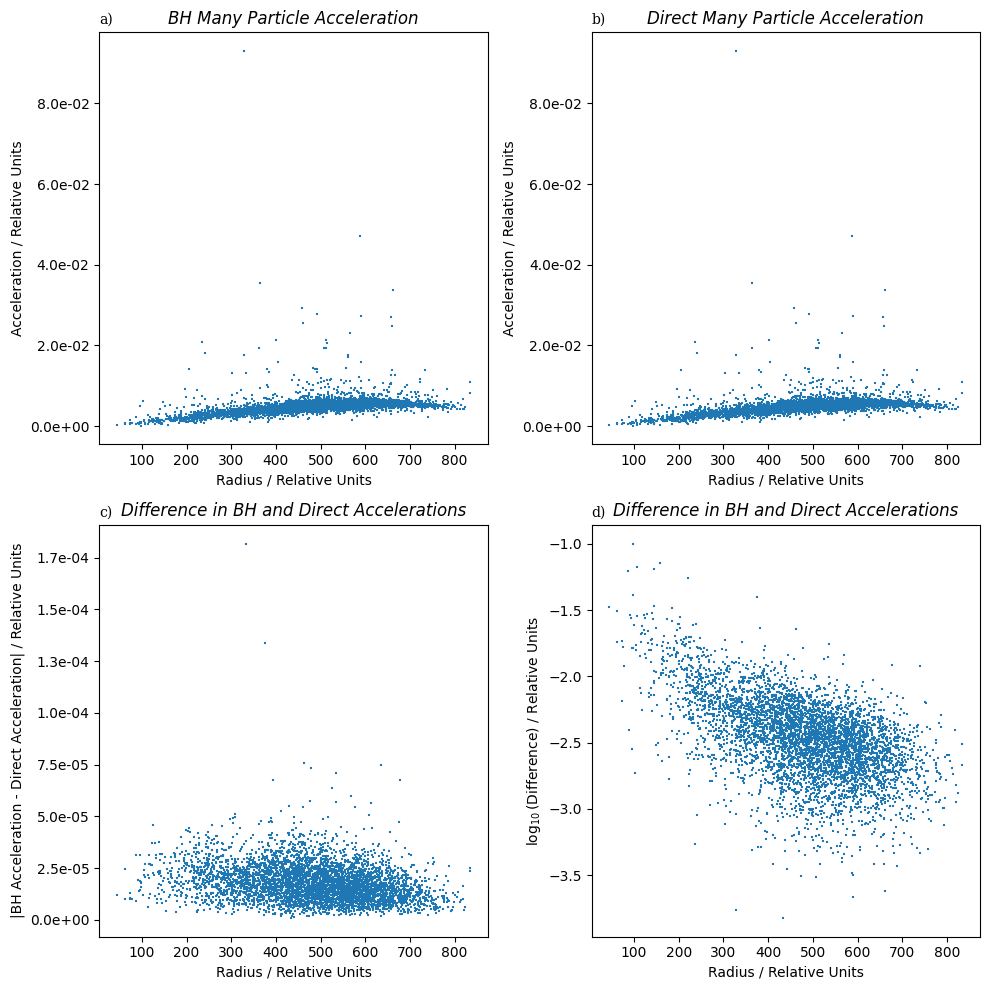

In [26]:
many_particle_fig, many_particle_axs = plt.subplots(2,2)
bh_many_results = util.calc_3D_results(bh_many_particles, centre_position, plotting=True, scatter = True, marker_size = 1, format="+", fig=many_particle_fig, ax=many_particle_axs[0,0], title="BH Many Particle Acceleration", x_label="Radius / Relative Units", y_label="Acceleration / Relative Units", axis_label="a)")
direct_many_results = util.calc_3D_results(direct_particles, centre_position, plotting=True, scatter = True, marker_size = 1, format="+", fig=many_particle_fig, ax=many_particle_axs[0,1], title="Direct Many Particle Acceleration", x_label="Radius / Relative Units", y_label="Acceleration / Relative Units", axis_label="b)")
bh_direct_results = util.calc_3D_difference_results(bh_many_particles, direct_particles, centre_position, True, scatter = True, marker_size = 1, format="+", fig=many_particle_fig, ax=many_particle_axs[1,0], title="Difference in BH and Direct Accelerations", x_label="Radius / Relative Units", y_label="|BH Acceleration - Direct Acceleration| / Relative Units", axis_label="c)")
log_bh_direct_results = util.calc_3D_relative_error_results(bh_many_particles, direct_particles, centre_position, True, scatter = True, marker_size = 1, format="+", fig=many_particle_fig, ax=many_particle_axs[1,1], title="Difference in BH and Direct Accelerations", x_label="Radius / Relative Units", y_label=r"$\log_{10}(\text{Difference})$ / Relative Units", axis_label="d)")

many_particle_fig.set_size_inches(10,10)
many_particle_fig.tight_layout()

### Increasing Accuracy

theta = 10
theta = 2
theta = 1.5
theta = 1.25
theta = 1
theta = 0.9
theta = 0.7
theta = 0.5
theta = 0.3


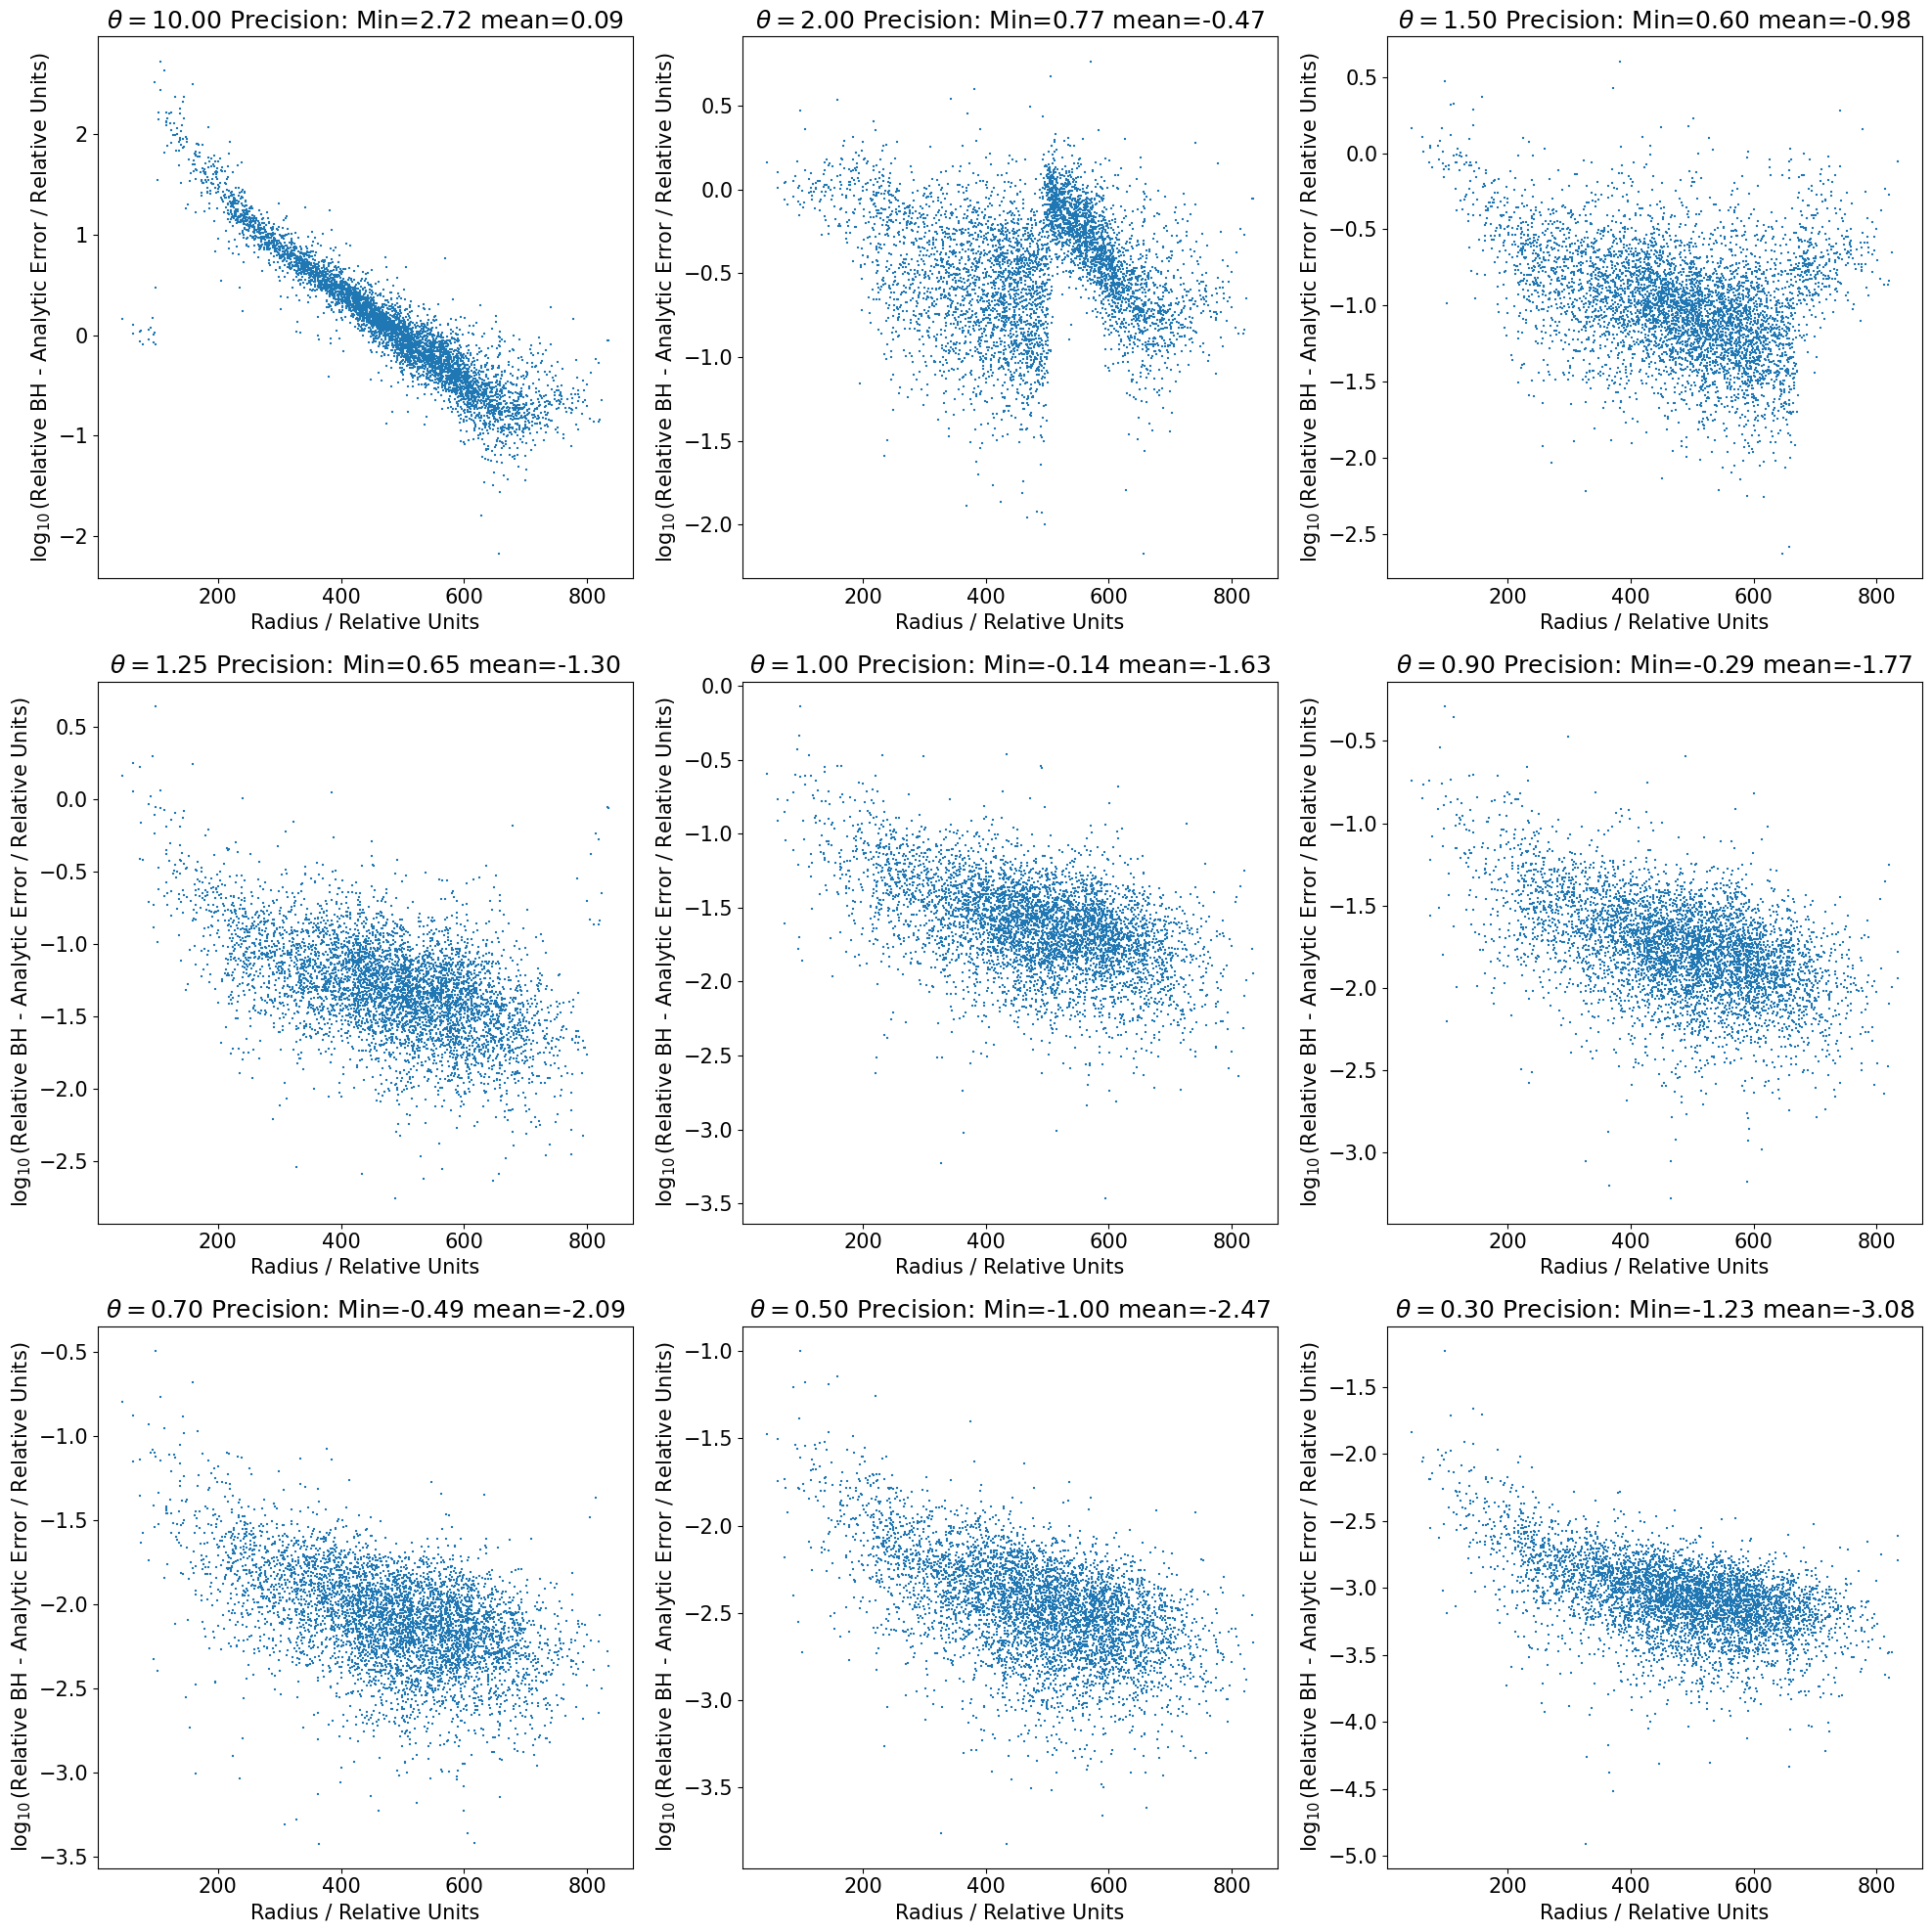

In [36]:
accuracy_fig, accuracy_axs = plt.subplots(3,3)
plt.rcParams.update({'font.size': 15})
i = 0
for theta in [10,2,1.5,1.25,1,0.9,0.7,0.5,0.3]:
    print("theta = " + str(theta))
    bh_accuracy_particles = copy.deepcopy(initial_particles)
    bh_accuracy_particle_simulation = BH(box_size, bh_accuracy_particles, theta=theta)
    bh_accuracy_particle_simulation.run(single_particle_position, plotting=False)
    log_bh_direct_results = util.calc_3D_relative_error_results(bh_accuracy_particles, direct_particles, centre_position, True, scatter = True, marker_size = 1, format="+", fig=accuracy_fig, ax=accuracy_axs[int(i/3), i%3], x_label="Radius / Relative Units", y_label=r"$\log_{10}(\text{Relative BH - Analytic Error / Relative Units})$")
    log_bh_direct_results.ax.set_title(r"$\theta=$" + '{0:.2f}'.format(theta) + " Precision: Min=" + '{0:.2f}'.format(log_bh_direct_results.max) + " mean=" + '{0:.2f}'.format(log_bh_direct_results.mean))
    i += 1
accuracy_fig.set_size_inches(20,20)
accuracy_fig.tight_layout()
accuracy_fig
plt.show()